<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font color=2565AE size=4>
محمدتقی دهقان نژاد <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 2
<br>
SVM 
<br>
100 نمره
    
    
____


In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load data

Load the breast cancer dataset from scikit-learn using the following code:


In [6]:
from sklearn.datasets import load_breast_cancer
data= load_breast_cancer()

# A. Data Splitting (5 points)

Split the dataset into training and testing sets using a 70/30 split.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# B. Linear SVC Model (15 points)

Implement a linear SVM classifier using scikit-learn's LinearSVC. Train the classifier on the training set and evaluate its accuracy on the testing set. {15 points}


In [9]:
linear_svc = LinearSVC(dual=False, max_iter=10000)
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


# C. RBF Kernel SVM (15 points)

Implement a kernel SVM classifier using scikit-learn's SVC with the RBF kernel. Train the classifier on the training set and evaluate its accuracy on the testing set. Experiment with different values of the gamma parameter to see how it affects the performance of the classifier. {15 points}

In [11]:
for gamma in [0.1, 0.5, 1.0, 2.0, 5.0]:
    rbf_svc = SVC(kernel='rbf', gamma=gamma)
    rbf_svc.fit(X_train, y_train)
    y_pred = rbf_svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Gamma = {gamma:.1f}   Accuracy = {accuracy:.4f}")

Gamma = 0.1   Accuracy = 0.6316
Gamma = 0.5   Accuracy = 0.6316
Gamma = 1.0   Accuracy = 0.6316
Gamma = 2.0   Accuracy = 0.6316
Gamma = 5.0   Accuracy = 0.6316


# D. Polynomial Kernel SVM (15 points)

Implement a kernel SVM classifier using scikit-learn's SVC with the polynomial kernel. Train the classifier on the training set and evaluate its accuracy on the testing set. Experiment with different values of the degree and coef0 parameters to see how they affect the performance of the classifier. {15 points}

In [12]:
for degree in [2, 3, 4]:
    for coef0 in [0.0, 0.5, 1.0]:
        poly_svc = SVC(kernel='poly', degree=degree, coef0=coef0)
        poly_svc.fit(X_train, y_train)
        y_pred = poly_svc.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Degree = {degree}  Coef0 = {coef0:.1f}  Accuracy = {accuracy:.2f}")

Degree = 2  Coef0 = 0.0  Accuracy = 0.94
Degree = 2  Coef0 = 0.5  Accuracy = 0.94
Degree = 2  Coef0 = 1.0  Accuracy = 0.94
Degree = 3  Coef0 = 0.0  Accuracy = 0.94
Degree = 3  Coef0 = 0.5  Accuracy = 0.94
Degree = 3  Coef0 = 1.0  Accuracy = 0.94
Degree = 4  Coef0 = 0.0  Accuracy = 0.93
Degree = 4  Coef0 = 0.5  Accuracy = 0.94
Degree = 4  Coef0 = 1.0  Accuracy = 0.95


# E. Comparison (25 points)

Compare the accuracy of the three classifiers implemented in questions 2, 3, and 4. Which classifier performed better and why?(There is no need to code, explain in text **completely**) {25 points}


accuracy of <b>Linear SVC Model = 0.94

accuracy of <b>RBF Kernel SVM = 0.6316

accuracy of <b>Polynomial Kernel SVM = Degree = 4 , Coef0 = 1.0 , Accuracy = 0.95

<h5>Comparing:</h5><br>
Based on the accuracy values provided, it appears that the Linear SVC and Polynomial Kernel SVM performed better than the RBF Kernel SVM. 
The Linear SVC has an accuracy of 0.94, which indicates that it was able to classify the majority of the test instances correctly. This may be due to the linear decision boundary used by the model, which works well when the classes are well-separated.
The RBF Kernel SVM has an accuracy of 0.6316, which is significantly lower than the Linear SVC. This may be due to the non-linear decision boundary used by the model, which may not be able to capture the complex relationship between the features and the target variable.
The Polynomial Kernel SVM with degree = 4 and coef0 = 1.0 has an accuracy of 0.95, which is the highest among the three classifiers. This may be because the polynomial kernel is able to capture more complex relationships between the features and the target variable, and the selected degree and coef0 parameters were able to fit the data well.
Overall, the Polynomial Kernel SVM appears to have performed the best in this scenario, followed by the Linear SVC. However, it's important to keep in mind that the performance of these models may vary depending on the dataset and the specific problem being tackled.

# F. Decision Boundary Visualization (25 points)

Visualize the decision boundaries for the classifiers implemented in questions 2, 3, and 4 using matplotlib. Plot the training and testing data as well. {25 points}


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


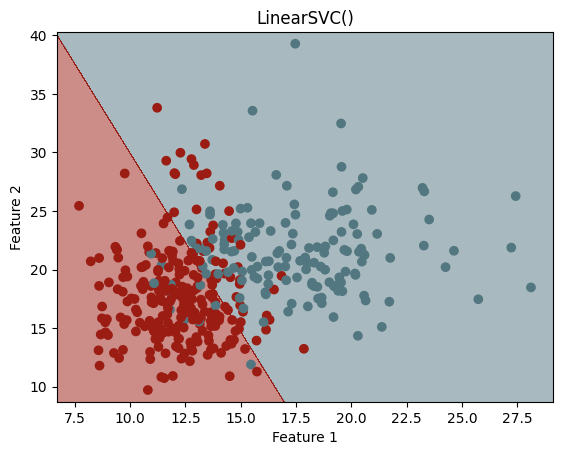

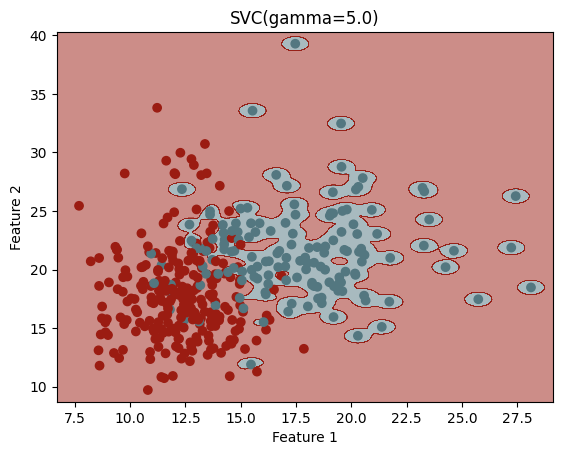

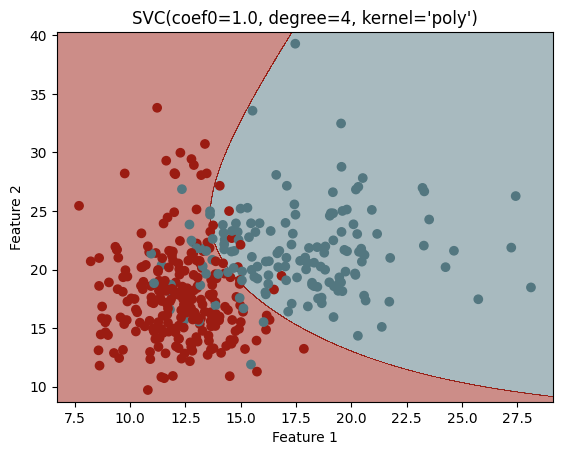

In [18]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#537780', '#9B1C12'])
for classifier in [linear_svc,rbf_svc,poly_svc]:
    classifier.fit(X_train[:, :2], y_train)  # only using first two features for visualization
    xx, yy = np.meshgrid(np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.01),
                         np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(classifier)
    plt.show()